
# Correlating Specific Pollution Sources with Air Quality Level

Steffany Lara, Brisma Alvarez, Emiliano Ruiz and Daniel De Pool

*Instituto Tecnológico y de Estudios Superiores de Monterrey (ITESM)*

**Abstract**


The overall objective is to quantify and explain the relative contribution of specific pollution sources such as factories, airports, and vehicular traffic to criteria pollutant levels in Monterrey through multivariate time series analysis from monitoring stations, in order to prioritize mitigation and optimization actions for air quality management.


## Importing the Data

### Exploratory Analysis

With aim of comprehending the data for a better prediction, the information from all the datasets would be analyzed. At a glance, in this approach, information regarding gases concentration from 2020 to 2022 would be used just for exploratory analysis, so that, we'll understand how the quarantine and reduction of multiples industries and less traffic congestion impacted on the concentration of polluting gases. Also, information from 2023 to 2024 would be useful in this exploratory analysis. Furthermore, information regarding the dataset "Padrón Medio Ambiente" would be checked for understanding which places have the most concurrency and the models that are more common in all of those places.  


In [52]:
#Importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

from sklearn.impute import KNNImputer


In [53]:
#First, we will joing all the databases in the same format: an excel with multiple sheets, every sheet cointains information regarding a certain station.,


#año 2020 y 2021 

db_2020_2021 = pd.read_excel("Bases_Datos/DATOS HISTÓRICOS 2020_2021_TODAS ESTACIONES.xlsx",sheet_name=None) 
db_2022_2023 = pd.read_excel("Bases_Datos/DATOS HISTÓRICOS 2022_2023_TODAS ESTACIONES.xlsx",sheet_name=None)
db_2023_2024 = pd.read_excel("Bases_Datos/DATOS HISTÓRICOS 2023_2024_TODAS ESTACIONES_ITESM-2.xlsx",sheet_name=None)


In [54]:
print(db_2020_2021.keys())
print(db_2022_2023.keys())
print(db_2023_2024.keys())


dict_keys(['SURESTE', 'NORESTE', 'CENTRO', 'NOROESTE', 'SUROESTE', 'NOROESTE2', 'NORTE', 'SUROESTE2', 'SURESTE2', 'SURESTE3', 'SUR', 'NORTE2', 'NORESTE2', 'NORESTE3', 'NOROESTE3', 'CATÁLOGO'])
dict_keys(['SURESTE', 'NORESTE', 'CENTRO', 'NOROESTE', 'SUROESTE', 'NOROESTE2', 'NORTE', 'SUROESTE2', 'SURESTE2', 'SURESTE3', 'SUR', 'NORTE2', 'NORESTE2', 'NORESTE3', 'NOROESTE3', 'CATÁLOGO'])
dict_keys(['Param_horarios_Estaciones', 'Hoja2'])


In [55]:
print(db_2022_2023['NOROESTE2'])

                     date    CO    NO   NO2    NOX    O3   PM10   PM2.5  \
0     2022-01-01 00:00:00  2.22   4.7  25.3   30.0  22.0  273.0  223.32   
1     2022-01-01 01:00:00  2.54  12.0  31.3   43.1  12.0  169.0  114.31   
2     2022-01-01 02:00:00  4.30  72.0  39.1  110.9   6.0  215.0  143.92   
3     2022-01-01 03:00:00  2.07  12.9  17.8   30.6  15.0  291.0  218.59   
4     2022-01-01 04:00:00  1.08   3.0   3.8    6.7  24.0  134.0   71.94   
...                   ...   ...   ...   ...    ...   ...    ...     ...   
14250 2023-08-17 19:00:00  0.30   2.9   8.7   11.6  39.0  109.0     NaN   
14251 2023-08-17 20:00:00  0.33   2.9  10.5   13.4  32.0  102.0     NaN   
14252 2023-08-17 21:00:00  0.34   3.4  15.9   19.3  25.0   97.0     NaN   
14253 2023-08-17 22:00:00  0.43   4.8  23.0   27.8  15.0  103.0     NaN   
14254 2023-08-17 23:00:00  0.31   3.3  12.5   15.7  22.0  116.0     NaN   

         PRS  RAINF    RH  SO2     SR   TOUT   WSR    WDR  
0      694.4    0.0  52.0  2.8  0.000  

Since the stations are separated by sheets in the excel, the Pandas reading function instead creates a dictionary of DataFrames with the name of each station.

In [56]:
print(db_2023_2024['Hoja2']) #it is empty, so we will create a dictionary of dataframes from the data of the first sheet

print(db_2023_2024['Param_horarios_Estaciones'].columns)
df = db_2023_2024['Param_horarios_Estaciones']

df = df.drop(index=0).reset_index(drop=True) 
df = df.drop(index=0).reset_index(drop=True) 
print(df)



Empty DataFrame
Columns: []
Index: []
Index(['Unnamed: 0', 'SURESTE', 'SURESTE.1', 'SURESTE.2', 'SURESTE.3',
       'SURESTE.4', 'SURESTE.5', 'SURESTE.6', 'SURESTE.7', 'SURESTE.8',
       ...
       'NOROESTE 3.5', 'NOROESTE 3.6', 'NOROESTE 3.7', 'NOROESTE 3.8',
       'NOROESTE 3.9', 'NOROESTE 3.10', 'NOROESTE 3.11', 'NOROESTE 3.12',
       'NOROESTE 3.13', 'NOROESTE 3.14'],
      dtype='object', length=240)
                Unnamed: 0 SURESTE SURESTE.1 SURESTE.2 SURESTE.3 SURESTE.4  \
0      2023-01-01 00:00:00    2.37      54.5      32.6      87.1         3   
1      2023-01-01 01:00:00    2.12      38.7      30.3      68.9         3   
2      2023-01-01 02:00:00    2.05      38.7      28.8      67.4         3   
3      2023-01-01 03:00:00     2.5      60.5      29.1      89.4         3   
4      2023-01-01 04:00:00    1.94      42.3      25.7      67.7       NaN   
...                    ...     ...       ...       ...       ...       ...   
13865  2024-07-31 19:00:00    0.67       

In [57]:
import pandas as pd  # Assuming pandas is imported

# Your DataFrame
df = db_2023_2024['Param_horarios_Estaciones']

# Define lists of stations and starting column indices
estaciones_db_2023_2024 = [
    'SURESTE', 'NORESTE', 'CENTRO', 'NOROESTE', 'SUROESTE',
    'NOROESTE2', 'NORTE', 'NORESTE2', 'SURESTE2', 'SUROESTE2',
    'SURESTE 3', 'SUR', 'NORTE2', 'NORESTE3', 'NOROESTE3'
]
estaciones_db_2023_2024_inicio = [1, 17, 33, 49, 65, 81, 97, 113, 129, 145, 161, 177, 193, 209, 225]

# Create the dictionary
diccionario_db_2023_2024 = {}
for estacion, inicio in zip(estaciones_db_2023_2024, estaciones_db_2023_2024_inicio):
    # Select column 0 (date) and 15 parameter columns (inicio to inicio + 14, inclusive)
    cols_indices = [0] + list(range(inicio, inicio + 15))  # Adjusted to 15 to include all parameters
    # Verify that indices don't exceed the number of columns
    print("-"*10,estacion)
    cols = df.iloc[:, cols_indices]
    # Use row 0 as column names (parameters: date, CO, NO, etc.)
    new_column_names = ['date'] + cols.iloc[0, 1:].fillna('unknown').tolist()  # Replace NaN in row 0, skip date column
    # Create new DataFrame, dropping rows 0 (parameters) and 1 (units)
    new_df = cols.drop(index=[0, 1]).reset_index(drop=True).copy()
    # Assign new column names
    new_df.columns = new_column_names
    diccionario_db_2023_2024[estacion] = new_df
    print(diccionario_db_2023_2024[estacion].head())
    
# Example: Print first few rows of NOROESTE3

print("Claves del diccionario:", diccionario_db_2023_2024.keys())

---------- SURESTE
                  date    CO    NO   NO2   NOX   O3 PM10  PM2.5    PRS RAINF  \
0  2023-01-01 00:00:00  2.37  54.5  32.6  87.1    3  110     68  721.7     0   
1  2023-01-01 01:00:00  2.12  38.7  30.3  68.9    3  116  67.18  721.5     0   
2  2023-01-01 02:00:00  2.05  38.7  28.8  67.4    3  117  75.12  721.1     0   
3  2023-01-01 03:00:00   2.5  60.5  29.1  89.4    3  135  82.81  720.8     0   
4  2023-01-01 04:00:00  1.94  42.3  25.7  67.7  NaN  132  59.56  720.7     0   

   RH  SO2 SR   TOUT  WSR  WDV  
0  68  3.5  0  16.39  3.2  257  
1  72  3.4  0  15.17  3.3  278  
2  71  3.6  0  14.82  3.7  278  
3  68  3.8  0  15.51  3.6  197  
4  73  3.6  0  13.81  4.9  271  
---------- NORESTE
                  date    CO    NO   NO2    NOX O3 PM10 PM2.5    PRS RAINF  \
0  2023-01-01 00:00:00   3.4  30.4    43   73.4  7  222   NaN  718.4     0   
1  2023-01-01 01:00:00   4.3  67.2  44.4  111.6  8  311   NaN  718.1     0   
2  2023-01-01 02:00:00  4.28  63.9  41.5  105.5  

Now I will rewrite the dictionary that we imported from the beggining.



In [58]:
db_2023_2024 = diccionario_db_2023_2024
print(db_2023_2024.keys())

with pd.ExcelWriter('Bases_Datos/DATOS HISTÓRICOS 2023_2024_TODAS ESTACIONES - corregido.xlsx', engine='openpyxl') as writer:
    for sheet_name, df in db_2023_2024.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print("Archivo Excel creado DATOS HISTÓRICOS 2023_2024_TODAS ESTACIONES - corregido.xlsx")

dict_keys(['SURESTE', 'NORESTE', 'CENTRO', 'NOROESTE', 'SUROESTE', 'NOROESTE2', 'NORTE', 'NORESTE2', 'SURESTE2', 'SUROESTE2', 'SURESTE 3', 'SUR', 'NORTE2', 'NORESTE3', 'NOROESTE3'])
Archivo Excel creado DATOS HISTÓRICOS 2023_2024_TODAS ESTACIONES - corregido.xlsx


Since 2023 is repeated in 2 datasets, the data is repeated. Thus, records for 2023 in the dictionary db_2022_2023 will be removed. The reason of this selection is because in the database 2022-2023 information of year 2023 from august to december doesn't exist.

In [59]:
# db_2022_2023
db_2022={}

for estacion in db_2022_2023.keys():
    df = db_2022_2023[estacion]
    #we are filtering the df, so then it doesn´t include the records in which year is 2023
    df_filtrado = df[~df.iloc[:, 0].astype(str).str.contains("2023", na=False)]

    db_2022[estacion] = df_filtrado


# Since the formats of the dataframes in db_2022 and db_2023 are different, we will standardize them to have the same columns
columnas_estandar = ['date', 'CO', 'NO', 'NO2', 'NOX', 'O3', 
                     'PM10', 'PM2.5', 'PRS', 'RAINF', 'RH', 
                     'SO2', 'SR', 'TOUT', 'WSR', 'WDR']

def estandarizar_diccionario(diccionario):
    nuevo_dicc = {}
    for estacion, df in diccionario.items():
        # Crear copia para no modificar el original
        df_copy = df.copy()

        # Asegurar que todas las columnas existan
        for col in columnas_estandar:
            if col not in df_copy.columns:
                df_copy[col] = pd.NA  # columna vacía si no existe

        # Reordenar y eliminar columnas extra
        df_copy = df_copy[columnas_estandar]

        nuevo_dicc[estacion] = df_copy
    return nuevo_dicc

db_2022 = estandarizar_diccionario(db_2022)
db_2023_2024 = estandarizar_diccionario(db_2023_2024)




In [60]:
print(db_2023_2024.keys())

# CHANGING THE NAME OF THE KEY 'SURESTE 3' TO 'SURESTE3' TO AVOID ISSUES LATER
db_2023_2024['SURESTE3'] = db_2023_2024.pop('SURESTE 3')
print(db_2023_2024.keys())


dict_keys(['SURESTE', 'NORESTE', 'CENTRO', 'NOROESTE', 'SUROESTE', 'NOROESTE2', 'NORTE', 'NORESTE2', 'SURESTE2', 'SUROESTE2', 'SURESTE 3', 'SUR', 'NORTE2', 'NORESTE3', 'NOROESTE3'])
dict_keys(['SURESTE', 'NORESTE', 'CENTRO', 'NOROESTE', 'SUROESTE', 'NOROESTE2', 'NORTE', 'NORESTE2', 'SURESTE2', 'SUROESTE2', 'SUR', 'NORTE2', 'NORESTE3', 'NOROESTE3', 'SURESTE3'])


In [61]:
#we will create 1 master set

#2022 with 2023-2024 (joining 2 datasets)

print(db_2022.keys())
#verify if the columns are the same, I'll join them 

# I'll create a master db containing 2020 and 2022 data
db_2022_2024 = {}

for station in db_2023_2024.keys():
    if station in db_2022:
        df1 = db_2023_2024[station]
        df2 = db_2022[station]
        
        #if the content is the same they will join
        cols1 = df1.columns.tolist()
        cols2 = df2.columns.tolist()
        if cols1 == cols2:
            df_combined = pd.concat([df1, df2], ignore_index=True)
            db_2022_2024[station] = df_combined
        else:
            #I'll say wheter or not they have differences
            print(f"Advertencia: Las columnas de {station} no coinciden.")
            print(f"db_2020_2021[{station}]: {cols1}")
            print(f"db_2022_2023[{station}]: {cols2}")
            #I joing common columns
            common_cols = list(set(cols1).intersection(cols2))
            if common_cols:
                print(f"Usando columnas comunes para {station}: {common_cols}")
                df_combined = pd.concat([df1[common_cols], df2[common_cols]], ignore_index=True)
                df_combined['date'] = pd.to_datetime(df_combined['date'], errors='coerce')
                df_combined = df_combined.sort_values('date').reset_index(drop=True)
                db_2022_2024[station] = df_combined
            elif station=="NOROESTE3":#esta es excepción porque comenzó apartir de 2022 por tanto no estará en la otra db
                    df_combined = df2
                    db_2022_2024[station] = df_combined
                    print("Caso de ",station," exceptúa base de datos 2020-2021 por excepción en Estación Misión San Juan.")
            else:
                print(f"No hay columnas comunes para {station}. Omitiendo.")
    else:
        print(f"Advertencia: La estación {station} no está en db_2022")

# I'll just take 1 CATALOGO
if 'CATÁLOGO' in db_2023_2024:
    db_2022_2024['CATÁLOGO'] = db_2020_2021['CATÁLOGO']  # O usa db_2022_2023['CATÁLOGO']




dict_keys(['SURESTE', 'NORESTE', 'CENTRO', 'NOROESTE', 'SUROESTE', 'NOROESTE2', 'NORTE', 'SUROESTE2', 'SURESTE2', 'SURESTE3', 'SUR', 'NORTE2', 'NORESTE2', 'NORESTE3', 'NOROESTE3', 'CATÁLOGO'])


/var/folders/np/yy_3zlhd2hs9vb9rvz27v_gw0000gn/T/ipykernel_8075/199008790.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_combined = pd.concat([df1, df2], ignore_index=True)


In [62]:
# I'll check if the keys are the stations
print("Claves de db_2022_2024:", db_2022_2024.keys())

Claves de db_2022_2024: dict_keys(['SURESTE', 'NORESTE', 'CENTRO', 'NOROESTE', 'SUROESTE', 'NOROESTE2', 'NORTE', 'NORESTE2', 'SURESTE2', 'SUROESTE2', 'SUR', 'NORTE2', 'NORESTE3', 'NOROESTE3', 'SURESTE3'])


Finally, we will turn the data type of the data into datatime, and remove "CATALOGO" because it's not relevant for the computational analysis. Regarding the information of the other data I can't check the information of the other variables, since they are numeric but habe labels according to specific situations.

In [63]:
import pandas as pd

db_2022_2024.pop("CATÁLOGO", None)


# Convertir 'date' a datetime en db_2022_2024
for station in db_2022_2024:
    try:
        db_2022_2024[station]['date'] = pd.to_datetime(
            db_2022_2024[station]['date'], 
            format='%d/%m/%y %H:%M', 
            errors='coerce'
        )
        print(f"Conversión exitosa para {station} en db_2022_2024")
    except Exception as e:
        print(f"Error en {station} (db_2022_2024): {e}")


Conversión exitosa para SURESTE en db_2022_2024
Conversión exitosa para NORESTE en db_2022_2024
Conversión exitosa para CENTRO en db_2022_2024
Conversión exitosa para NOROESTE en db_2022_2024
Conversión exitosa para SUROESTE en db_2022_2024
Conversión exitosa para NOROESTE2 en db_2022_2024
Conversión exitosa para NORTE en db_2022_2024
Conversión exitosa para NORESTE2 en db_2022_2024
Conversión exitosa para SURESTE2 en db_2022_2024
Conversión exitosa para SUROESTE2 en db_2022_2024
Conversión exitosa para SUR en db_2022_2024
Conversión exitosa para NORTE2 en db_2022_2024
Conversión exitosa para NORESTE3 en db_2022_2024
Conversión exitosa para NOROESTE3 en db_2022_2024
Conversión exitosa para SURESTE3 en db_2022_2024


## Exploratory Analysis of Data

For this part of the analysis, we are going to explore the data, with the aim of finding patterns and see which database and station is the most complete. Also, we will check tha mean concentration of gases in days after new politics or problems were imposed. 

In [64]:
#Final DataBases (db_2023_2024, db_2020_2022)

# SIMA gave us a chart with multiple meanings of the non-numeric data in the DB, we will write down the meanings for further exploration.

import pandas as pd

# ------------------Chart 1 (Stations)
df_estaciones = pd.DataFrame({
    "Abreviatura": ["SE", "NE", "CE", "NO", "SO", "NO2", "NTE", "NE2", "SE2", "SO2", "SE", "NTE2", "SE3"],
    "Descripción": ["Sureste", "Noreste", "Centro", "Noroeste", "Suroeste", "Noroeste 2", "Norte", "Noreste 2", 
                    "Sureste 2", "Suroeste 2", "Sur", "Norte 2", "Sureste 3"],
    "Estación": ["La Pastora", "San Nicolás", "Obispado", "San Bernabé", "Santa Catarina", "García", "Escobedo", 
                 "Apodaca", "Juárez", "San Pedro", "Pueblo Serena", "Universidad", "Cadereyta"],
    "Municipio": ["Guadalupe", "San Nicolás de los Garzas", "Monterrey", "Monterrey", "Santa Catarina", "García", 
                  "Escobedo", "Apodaca", "Juárez", "San Pedro Garza García", None, None, None]
})

# ------------------Chart 2 (Pollutants)
df_contaminantes = pd.DataFrame({
    "Abreviatura": ["PM10", "PM2.5", "O3*", "SO2*", "NO2*", "CO", "NO", "NOx"],
    "Contaminante": ["Material Particulado menor a 10 micrométros", 
                     "Material Particulado menor a 2.5 micrométros", 
                     "Ozono", 
                     "Dióxido de Azufre", 
                     "Dióxido de Nitrógeno", 
                     "Monóxido de Carbono", 
                     "Monóxido de Nitrógeno", 
                     "Es la suma de NO + NO2"],
    "Unidad": ["µg/m3", "µg/m3", "ppb", "ppb", "ppb", "ppm", "ppb", "ppb"]
})

# ------------------Chart 3 (Meteorological Parameters)
df_meteo = pd.DataFrame({
    "Abreviatura": ["TOUT", "RH", "SR", "RAINF**", "PRS", "WSR", "WDR"],
    "Contaminante": ["Temperatura", "Humedad Relativa", "Radiación Solar", "Precipitación", 
                     "Presión Atmosférica", "Velocidad del Viento", "Dirección del Viento"],
    "Unidad": ["ºC", "%", "kW/m2", "mm/Hr", "mm Hg", "Km/hr", "º"]
})

# ------------------Chart 4 (Flags)
df_flags = pd.DataFrame({
    "Flag": ["P", "p", "C", "c", "D", "d", "B", "b", "m", "l", "z", "o", "s", "r", "e", "a", "s", "f", "h", "n", "x"],
    "Description": ["Falla eléctrica", "Falla eléctrica", "Calibración", "Calibración", "Apagado", "Apagado", 
                    "Malas condiciones", "Malas condiciones", "Positivo sobre el rango", "Negativo sobre el rango", 
                    "Ceros y negativos", "PM10 mayor a 900 ug/m3", "Valores repetidos", 
                    "comparativo PM10 vs PM2.5", "Eliminar datos NO y Nox", 
                    "Eliminar PM menor a 5 ug/m3 y 0.05 ppm en CO", 
                    "Valores iguales consecutivos", 
                    "Valores 3 veces mayor que el valor anterior para PM10", 
                    "Valores de temperatura con más de 10 grados o 10 mmHg de diferencia de una hora", 
                    "falla de comunicación", 
                    "Valor que ya no esta manualmente, sí paso los protocolos, pero no debe estar ahí"],
    "Hora": ["Valida", "Invalida", "Valida", "Invalida", "Valida", "Invalida", "Valida", "Invalida", "Invalida", 
             "Invalida", "Invalida", "Invalida", "Invalida", "Invalida", "Invalida", "Invalida", "Invalida", 
             "Invalida", "Invalida", "Invalida", "Invalida"]
})

# Lista de banderas inválidas (Tabla 3)
invalid_flags = ['p', 'c', 'd', 'b', 'm', 'l', 'z', 'o', 's', 'r', 'e', 'a', 'f', 'h', 'n', 'x']
quant_vars = ['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2.5', 'SO2', 'PRS', 'RAINF', 'RH', 'SR', 'TOUT', 'WSR', 'WDR']
key_vars = ['NO2', 'PM2.5', 'SO2']  # Enfocadas en tráfico y refinería
# Mostrar un preview
print(df_estaciones.head())
print(df_contaminantes.head())
print(df_meteo.head())
print(df_flags.head())

  Abreviatura Descripción        Estación                  Municipio
0          SE     Sureste      La Pastora                  Guadalupe
1          NE     Noreste     San Nicolás  San Nicolás de los Garzas
2          CE      Centro        Obispado                  Monterrey
3          NO    Noroeste     San Bernabé                  Monterrey
4          SO    Suroeste  Santa Catarina             Santa Catarina
  Abreviatura                                  Contaminante Unidad
0        PM10   Material Particulado menor a 10 micrométros  µg/m3
1       PM2.5  Material Particulado menor a 2.5 micrométros  µg/m3
2         O3*                                         Ozono    ppb
3        SO2*                             Dióxido de Azufre    ppb
4        NO2*                          Dióxido de Nitrógeno    ppb
  Abreviatura         Contaminante Unidad
0        TOUT          Temperatura     ºC
1          RH     Humedad Relativa      %
2          SR      Radiación Solar  kW/m2
3     RAINF**   

Para este análisis, como es para industrias nos enfocaremos en: CO, NO, NO2, NOX, O3,SO2,PM10,PM2.5 que son las que mayor impacto generan a nivel de contaminación y que son  mayormente producidos por las industrias.

In [65]:
'''



------------If you want to fileter the dataframes to only include important variables, you can use the following code.------------
I'm commenting this part since I think most of the values are necessary for the analysis
and could give important information for the model fitting and imputation of data


variables_importantes = ['date','CO', 'NO', 'NO2', 'NOX', 'O3', 'SO2', 'PM10', 'PM2.5']

# Crear copias de los diccionarios con solo las variables de interés
db_2023_2024_variablesImportantes = {}
db_2020_2022_variablesImportantes = {}

# Copiar y filtrar para 2023-2024
for station in db_2023_2024:
    # Crear una copia del dataframe con solo las columnas especificadas
    db_2023_2024_variablesImportantes[station] = db_2023_2024[station][variables_importantes].copy()

# Copiar y filtrar para 2020-2022
for station in db_2020_2022:
    # Crear una copia del dataframe con solo las columnas especificadas
    db_2020_2022_variablesImportantes[station] = db_2020_2022[station][variables_importantes].copy()

# Imprimir información para verificar
print("="*80, "Dataset 2023-2024 después de conversión")
for station in db_2023_2024_variablesImportantes:
    print("-"*50, station)
    print("-"*25, "Tipos de Datos")
    print(db_2023_2024_variablesImportantes[station].info())

print("="*80, "Dataset 2020-2022 después de conversión")
for station in db_2020_2022_variablesImportantes:
    print("-"*50, station)
    print("-"*25, "Tipos de Datos")
    print(db_2020_2022_variablesImportantes[station].info())

'''

#I'll let it this way in case of further exploration with a certain limitation of data like done above
db_2022_2024_variablesImportantes = db_2022_2024

Ahora se hará un análisis exploratorio de los datos con la limpieza ya realizada. Como primer putno se toma en cuenta las variables 

In [66]:
import pandas as pd
import copy

# Listas que ya tienes
invalid_flags = ['p', 'c', 'd', 'b', 'm', 'l', 'z', 'o', 's', 'r', 'e', 'a', 'f', 'h', 'n', 'x']
all_quant_vars = ['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2.5', 'SO2', 'PRS', 'RAINF', 'RH', 'SR', 'TOUT', 'WSR', 'WDR']
key_vars = ['NO2', 'PM2.5', 'SO2']  # variables importantes por defecto

def nulls_by_station(dataset: dict, dataset_name: str, prefer_key_vars: bool = True):
    """
    Retorna y imprime un dict { estacion: total_nulos }.
    - Si prefer_key_vars=True usa key_vars si existen; si no, usa all_quant_vars presentes.
    - No modifica el dataset original.
    """
    # Copia superficial (los DataFrames no se tocan) para iterar seguro
    ds_keys = [k for k in dataset.keys() if k != 'CATÁLOGO']
    resultado = {}

    for station in ds_keys:
        df = dataset[station]
        if not isinstance(df, pd.DataFrame) or df.empty:
            resultado[station] = 0
            continue

        # Elegir columnas: primero key_vars si hay, si no all_quant_vars presentes
        cols_key = [c for c in key_vars if c in df.columns]
        cols_all = [c for c in all_quant_vars if c in df.columns]
        cols = cols_key if (prefer_key_vars and len(cols_key) > 0) else cols_all

        if len(cols) == 0:
            # Si no hay columnas cuantitativas conocidas, cuenta 0 nulos
            resultado[station] = 0
            continue

        # Convertir a numérico sin modificar el original
        df_numeric = df.copy()
        for c in cols:
            df_numeric[c] = pd.to_numeric(df_numeric[c], errors='coerce')

        # Sumar nulos solo en columnas seleccionadas
        total_nulos = int(df_numeric[cols].isna().sum().sum())
        resultado[station] = total_nulos

    # Imprimir ordenado
    print("="*70)
    print(f"Nulos por estación — {dataset_name}")
    print("-"*70)
    for est, nulos in sorted(resultado.items(), key=lambda x: x[1], reverse=True):
        print(f"{est:25s}  ->  {nulos} nulos")

    return resultado

# Ejemplos de uso con tus bases:
nulos_2324 = nulls_by_station(db_2022_2024_variablesImportantes, "2022–2024", prefer_key_vars=True)


Nulos por estación — 2022–2024
----------------------------------------------------------------------
NORESTE3                   ->  31294 nulos
NOROESTE3                  ->  16836 nulos
NOROESTE                   ->  15230 nulos
SUR                        ->  7431 nulos
NOROESTE2                  ->  6457 nulos
SURESTE                    ->  5629 nulos
CENTRO                     ->  5249 nulos
NORTE                      ->  4984 nulos
SUROESTE                   ->  4297 nulos
NORESTE2                   ->  4041 nulos
SURESTE2                   ->  3734 nulos
NORESTE                    ->  3239 nulos
SURESTE3                   ->  2669 nulos
NORTE2                     ->  2590 nulos
SUROESTE2                  ->  2313 nulos


In [67]:
db_2022_2024_variablesImportantes.keys()
db_2022_2024_variablesImportantes.keys()
db_2022_2024_variablesImportantes['NOROESTE3'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14613 entries, 0 to 14612
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    14613 non-null  datetime64[ns]
 1   CO      13021 non-null  object        
 2   NO      13094 non-null  object        
 3   NO2     13119 non-null  object        
 4   NOX     13115 non-null  object        
 5   O3      12937 non-null  object        
 6   PM10    13743 non-null  object        
 7   PM2.5   668 non-null    object        
 8   PRS     14494 non-null  object        
 9   RAINF   14506 non-null  object        
 10  RH      6762 non-null   object        
 11  SO2     13216 non-null  object        
 12  SR      14469 non-null  object        
 13  TOUT    14495 non-null  object        
 14  WSR     12640 non-null  object        
 15  WDR     14296 non-null  object        
dtypes: datetime64[ns](1), object(15)
memory usage: 1.8+ MB


Histogramas o Boxplots: Para ver la distribución de cada gas en ambas estaciones (ej. ¿PM2.5 tiene más valores extremos en la industrial?).
Series temporales: Plotea gases vs fecha para detectar tendencias (ej. picos de NO2 en invierno).
Pairplot: Para explorar relaciones entre gases (ej. ¿CO y NOX están correlacionados por venir de combustión?).
Gráficos comparativos: Boxplots o barras para comparar medias de gases entre estaciones.

In [68]:
import pandas as pd
import numpy as np

# Definir las variables de gases
gases = ['CO', 'NO', 'NO2', 'NOX', 'O3', 'SO2', 'PM10', 'PM2.5']

# Función para calcular y mostrar el ranking de estaciones por contaminación
def rank_contaminacion_por_estacion(dataset: dict, dataset_name: str):
    """
    Calcula un índice de contaminación por estación basado en la media normalizada de los gases.
    Muestra una lista ordenada de estaciones de más a menos contaminadas.
    - dataset: Diccionario con dataframes por estación.
    - dataset_name: Nombre del dataset (ej. '2023-2024').
    """
    resultados = []
    
    for station in dataset:
        df = dataset[station]
        if not isinstance(df, pd.DataFrame) or df.empty:
            print(f"Estación {station} no tiene datos válidos. Saltando.")
            continue
        
        # Filtrar solo columnas de gases presentes
        gases_presentes = [gas for gas in gases if gas in df.columns]
        if len(gases_presentes) == 0:
            print(f"Estación {station} no tiene gases disponibles. Saltando.")
            continue
        
        # Calcular la media de cada gas (ignorando NaN)
        medias = df[gases_presentes].mean()
        
        # Normalizar las medias (escalado Min-Max para comparar gases con unidades diferentes)
        medias_normalizadas = {}
        for gas in gases_presentes:
            min_val = df[gas].min()
            max_val = df[gas].max()
            if max_val > min_val:  # Evitar división por cero
                medias_normalizadas[gas] = (medias[gas] - min_val) / (max_val - min_val)
            else:
                medias_normalizadas[gas] = 0  # Si no hay variación, asignar 0
        
        # Calcular índice de contaminación (promedio de medias normalizadas)
        indice_contaminacion = np.mean(list(medias_normalizadas.values()))
        
        resultados.append({
            'Estación': station,
            'Índice de Contaminación': indice_contaminacion,
            'Medias': medias.to_dict()  # Guardar medias originales para referencia
        })
    
    # Convertir a DataFrame y ordenar de mayor a menor contaminación
    df_resultados = pd.DataFrame(resultados)
    if df_resultados.empty:
        print(f"No hay datos válidos para {dataset_name}.")
        return
    
    df_resultados = df_resultados.sort_values(by='Índice de Contaminación', ascending=False)
    
    # Imprimir ranking
    print("="*70)
    print(f"Ranking de Estaciones por Contaminación - {dataset_name}")
    print("-"*70)
    print(f"{'Rank':<5} {'Estación':<25} {'Índice de Contaminación':<25} {'Medias de Gases'}")
    print("-"*70)
    for idx, row in df_resultados.iterrows():
        medias_str = ', '.join([f"{k}: {v:.2f}" for k, v in row['Medias'].items()])
        print(f"{idx+1:<5} {row['Estación']:<25} {row['Índice de Contaminación']:.4f}              {medias_str}")
    
    return df_resultados

# Generar rankings para ambos datasets

rank_2324 = rank_contaminacion_por_estacion(db_2022_2024_variablesImportantes, "2022-2024")


Ranking de Estaciones por Contaminación - 2022-2024
----------------------------------------------------------------------
Rank  Estación                  Índice de Contaminación   Medias de Gases
----------------------------------------------------------------------
14    NOROESTE3                 0.1573              CO: 1.24, NO: 12.58, NO2: 13.59, NOX: 26.02, O3: 28.76, SO2: 4.21, PM10: 68.06, PM2.5: 7.71
11    SUR                       0.1354              CO: 1.15, NO: 7.10, NO2: 18.78, NOX: 25.79, O3: 27.43, SO2: 3.08, PM10: 49.57, PM2.5: 17.62
3     CENTRO                    0.1265              CO: 1.64, NO: 8.98, NO2: 16.90, NOX: 25.75, O3: 28.79, SO2: 4.64, PM10: 64.08, PM2.5: 24.43
10    SUROESTE2                 0.1110              CO: 1.50, NO: 7.93, NO2: 16.81, NOX: 24.71, O3: 28.06, SO2: 4.45, PM10: 65.10, PM2.5: 18.65
5     SUROESTE                  0.1106              CO: 1.67, NO: 15.01, NO2: 18.34, NOX: 33.18, O3: 28.01, SO2: 6.16, PM10: 65.99, PM2.5: 25.41
12    NORTE

In [69]:
#-----------------------------------------------ACA DANIEL HACE LA PARTE DE PREPARACION DE LOS DATOS
'''
Preparación de los datos
Seleccionar conjunto de datos
explicar imputaciones
 
identificar objetivos
Limpieza
Transformación de datos
discretizar
escalar y normalizar
Reformatear y reestructurar datos
Informe
'''
"""
================================================================================
      #####  #   #  ####   #   #  #####   ###    ####  #####   ###   #   #
        #    ## ##  #   #  #   #    #    #   #  #       #    #   #  ##  #
        #    # # #  ####   #   #    #    #####  #       #    #   #  # # #
        #    #   #  #      #   #    #    #   #  #       #    #   #  #  ##
      #####  #   #  #       ###     #    #   #   ####  #####   ###   #   #
                         I M P U T A C I O N

      ####   #####
      #   #  #
      #   #  ####
      #   #  #
      ####   #####
                               D E

      #      ###    ####
      #     #   #  #
      #     #   #   ###
      #     #   #      #
      #####  ###   ####
                           L O S

      ####    ###   #####   ###    ####
      #   #  #   #    #    #   #  #
      #   #  #####    #    #   #   ###
      #   #  #   #    #    #   #      #
      ####   #   #    #     ###   ####
                       D A T O S
================================================================================
"""



# Claves que voy a copiar
keys = ["NOROESTE2","SUROESTE2", "CENTRO", "SUR", "SURESTE3", "NORTE2"]


#Se filtran los datos para contener solo las estaciones de interés
db_2022_2024_filtrado = {k: db_2022_2024_variablesImportantes[k] for k in keys if k in db_2022_2024_variablesImportantes}
print(db_2022_2024_variablesImportantes.keys())  





dict_keys(['SURESTE', 'NORESTE', 'CENTRO', 'NOROESTE', 'SUROESTE', 'NOROESTE2', 'NORTE', 'NORESTE2', 'SURESTE2', 'SUROESTE2', 'SUR', 'NORTE2', 'NORESTE3', 'NOROESTE3', 'SURESTE3'])


In [70]:

imputer = KNNImputer(n_neighbors=3, weights='distance')
f24_clean = {}

for key in db_2022_2024_filtrado:
    df = db_2022_2024_filtrado[key].copy()
    df['date'] = df['date'].apply(lambda x: x.timestamp()).astype('float64')
    imputed = imputer.fit_transform(df)
    f24_clean[key] = pd.DataFrame(imputed)

cols_retouch = db_2022_2024_filtrado["SURESTE3"].columns

for key in f24_clean:
    f24_clean[key].columns = cols_retouch
    print(f24_clean[key].isnull().sum())



date     0
CO       0
NO       0
NO2      0
NOX      0
O3       0
PM10     0
PM2.5    0
PRS      0
RAINF    0
RH       0
SO2      0
SR       0
TOUT     0
WSR      0
WDR      0
dtype: int64
date     0
CO       0
NO       0
NO2      0
NOX      0
O3       0
PM10     0
PM2.5    0
PRS      0
RAINF    0
RH       0
SO2      0
SR       0
TOUT     0
WSR      0
WDR      0
dtype: int64
date     0
CO       0
NO       0
NO2      0
NOX      0
O3       0
PM10     0
PM2.5    0
PRS      0
RAINF    0
RH       0
SO2      0
SR       0
TOUT     0
WSR      0
WDR      0
dtype: int64
date     0
CO       0
NO       0
NO2      0
NOX      0
O3       0
PM10     0
PM2.5    0
PRS      0
RAINF    0
RH       0
SO2      0
SR       0
TOUT     0
WSR      0
WDR      0
dtype: int64
date     0
CO       0
NO       0
NO2      0
NOX      0
O3       0
PM10     0
PM2.5    0
PRS      0
RAINF    0
RH       0
SO2      0
SR       0
TOUT     0
WSR      0
WDR      0
dtype: int64
date     0
CO       0
NO       0
NO2      0
NOX      0


In [84]:
from sklearn.impute import KNNImputer
import pandas as pd

imputer = KNNImputer(n_neighbors=3, weights='distance')
f24_clean_weekday = {}

for key in db_2022_2024_filtrado:
    df = db_2022_2024_filtrado[key].copy()

    # Extraer día de la semana en lugar de hora
    df['weekday'] = df['date'].dt.dayofweek  

    # Convertir a numérico para el imputador
    df['weekday'] = df['weekday'].astype('float64')
    df['date'] = df['date'].apply(lambda x: x.timestamp()).astype('float64')

    # Imputación
    imputed = imputer.fit_transform(df)

    # Guardar en diccionario
    f24_clean_weekday[key] = pd.DataFrame(imputed, columns=df.columns)
    f24_clean_weekday[key]['weekday'] = f24_clean_weekday[key]['weekday'].astype('int32')
# Revisar nulos restantes
for key in f24_clean_weekday:
    print(f"Estación: {key}")
    print(f24_clean_weekday[key].isnull().sum())

Estación: NOROESTE2
date       0
CO         0
NO         0
NO2        0
NOX        0
O3         0
PM10       0
PM2.5      0
PRS        0
RAINF      0
RH         0
SO2        0
SR         0
TOUT       0
WSR        0
WDR        0
weekday    0
dtype: int64
Estación: SUROESTE2
date       0
CO         0
NO         0
NO2        0
NOX        0
O3         0
PM10       0
PM2.5      0
PRS        0
RAINF      0
RH         0
SO2        0
SR         0
TOUT       0
WSR        0
WDR        0
weekday    0
dtype: int64
Estación: CENTRO
date       0
CO         0
NO         0
NO2        0
NOX        0
O3         0
PM10       0
PM2.5      0
PRS        0
RAINF      0
RH         0
SO2        0
SR         0
TOUT       0
WSR        0
WDR        0
weekday    0
dtype: int64
Estación: SUR
date       0
CO         0
NO         0
NO2        0
NOX        0
O3         0
PM10       0
PM2.5      0
PRS        0
RAINF      0
RH         0
SO2        0
SR         0
TOUT       0
WSR        0
WDR        0
weekday    0
dtype:

In [72]:
#asumiendo que el dataset limpiado se llama


Imputado_db_2020_2022_variablesImportantes=f24_clean
Imputado_db_2020_2022_variablesImportantes_Days=f24_clean_weekday

In [73]:
def plot_hourly_pollutants(data_dict):
    """
    Para cada estación en el diccionario:
    - Convierte la columna 'date' de epoch a datetime
    - Calcula el promedio por hora del día de los contaminantes
    - Grafica las 24 horas con el promedio de cada contaminante
    """

    pollutants = ["CO", "NO", "NO2", "NOX", "O3", "PM10", "PM2.5", "SO2"]

    for station, df in data_dict.items():
        # Convertir la columna 'date' a datetime
        df['date'] = pd.to_datetime(df['date'], unit='s')

        # Crear columna con la hora del día
        df['Hora'] = df['date'].dt.hour

        # Filtrar solo contaminantes + Hora
        df_pollutants = df[pollutants + ['Hora']]

        # Calcular promedios por hora
        hourly_means = df_pollutants.groupby('Hora').mean()

        # Graficar
        plt.figure(figsize=(12, 6))
        for col in pollutants:
            if col in hourly_means.columns:
                plt.plot(hourly_means.index, hourly_means[col], label=col)

        plt.title(f"Promedio horario de contaminantes - {station}")
        plt.xlabel("Hora del día")
        plt.ylabel("Concentración promedio")
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True)
        plt.tight_layout()
        plt.show()


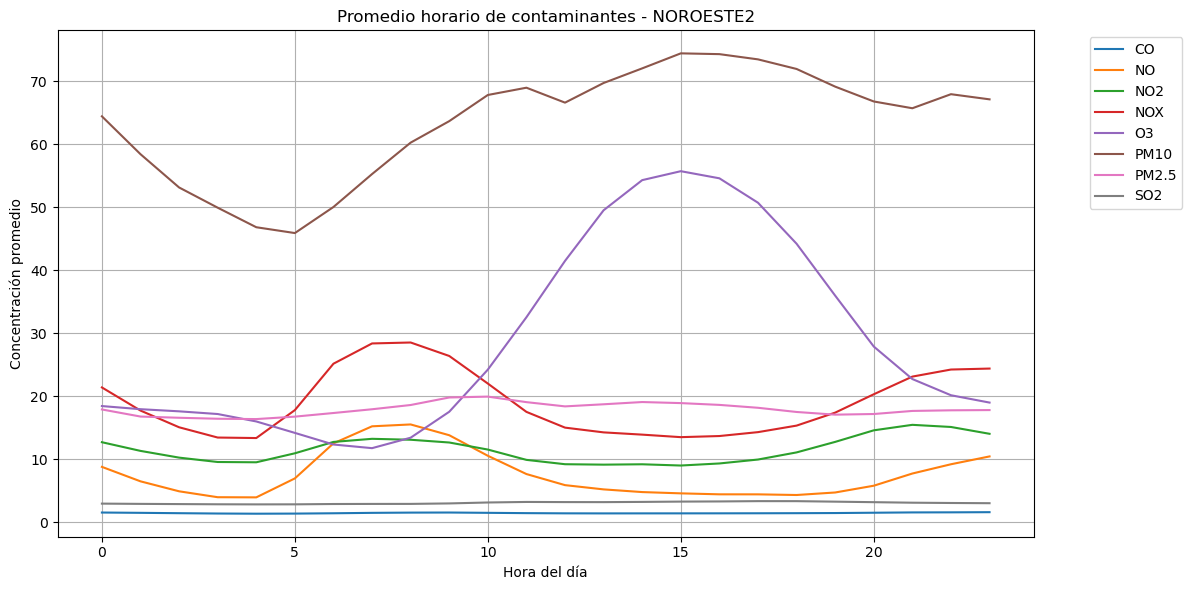

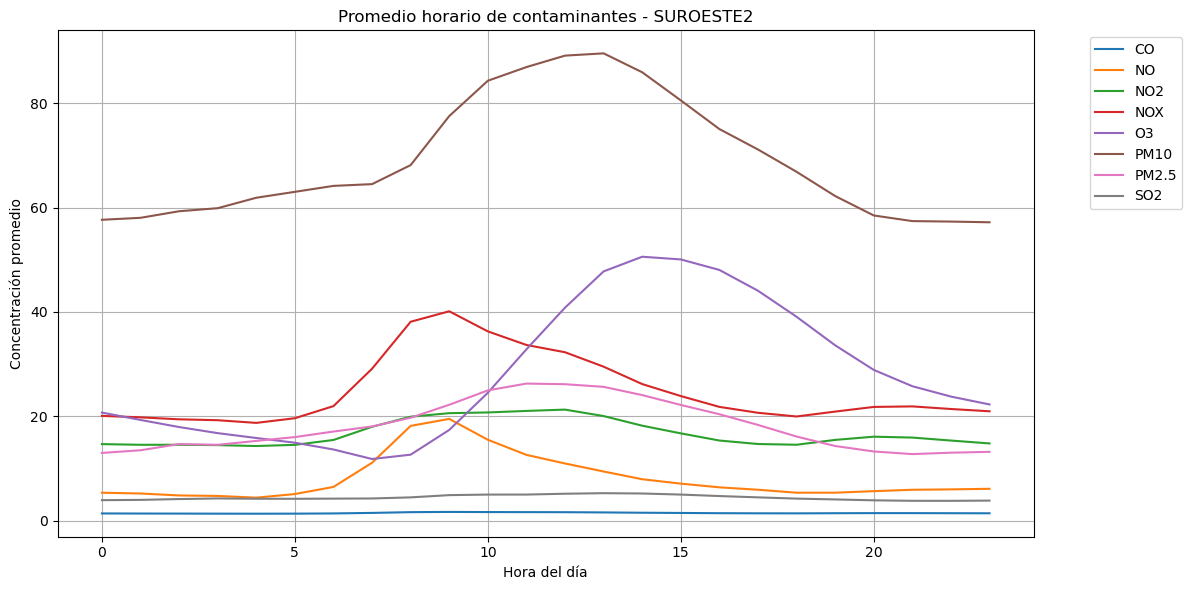

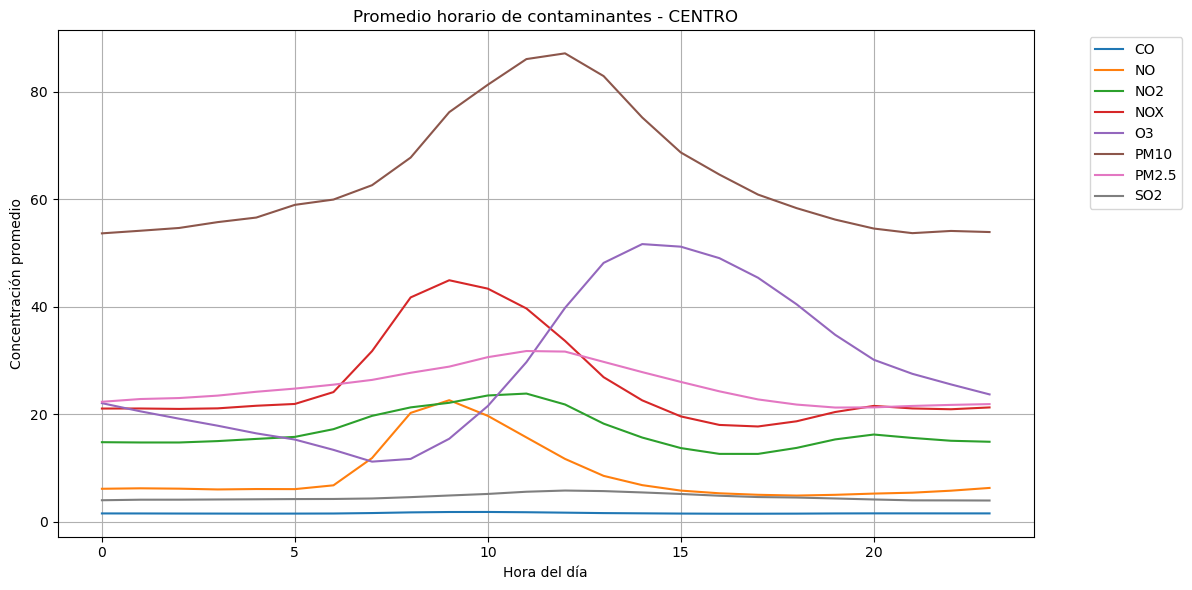

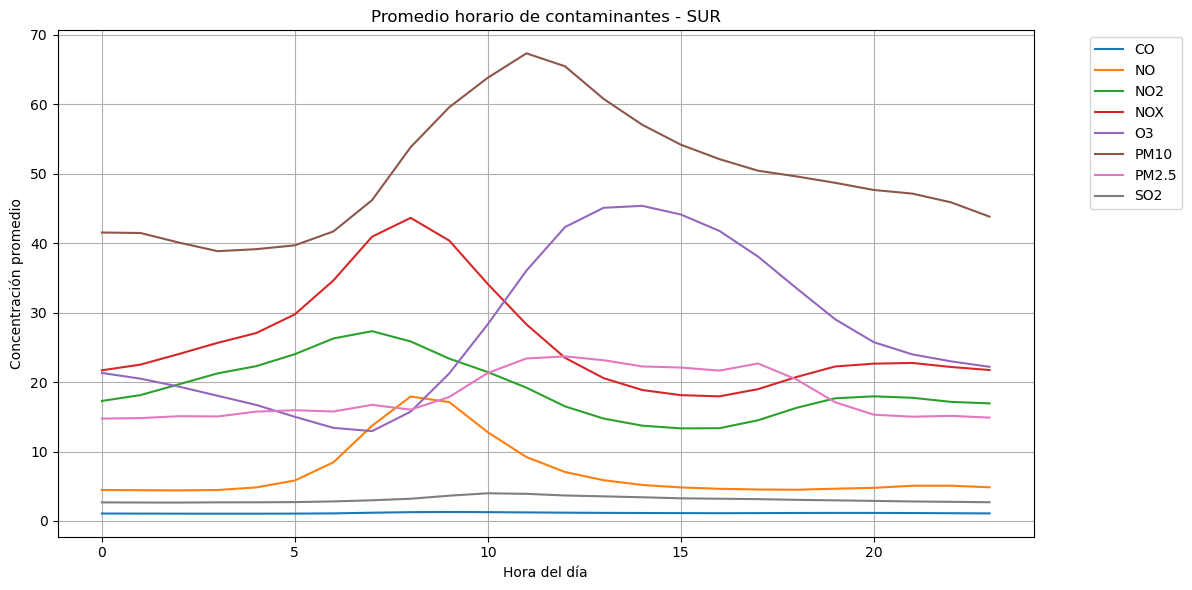

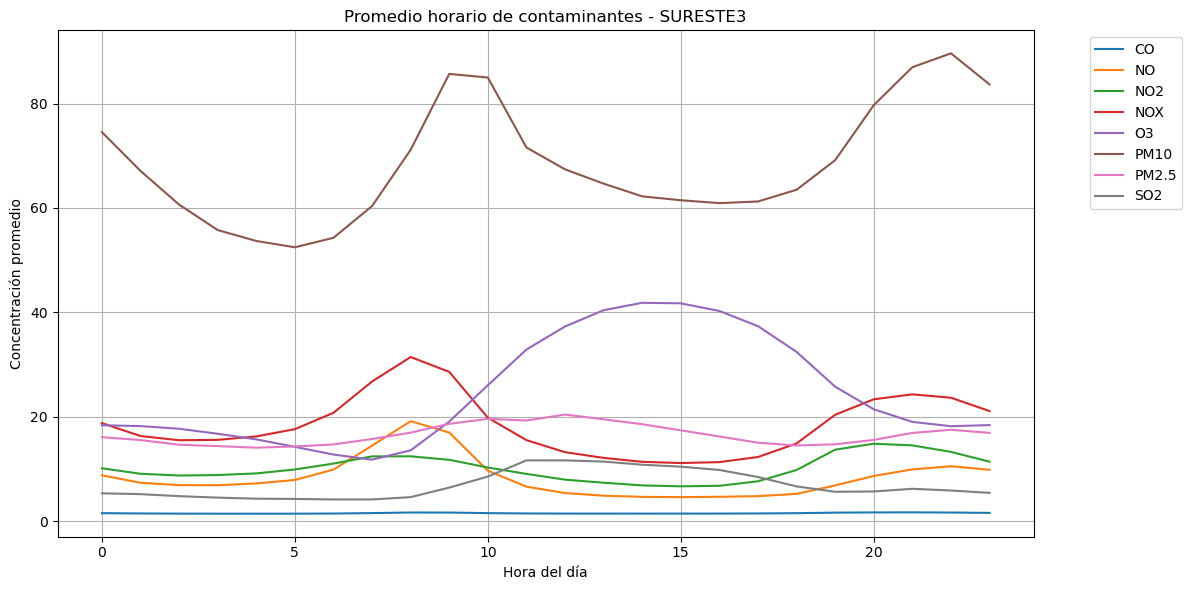

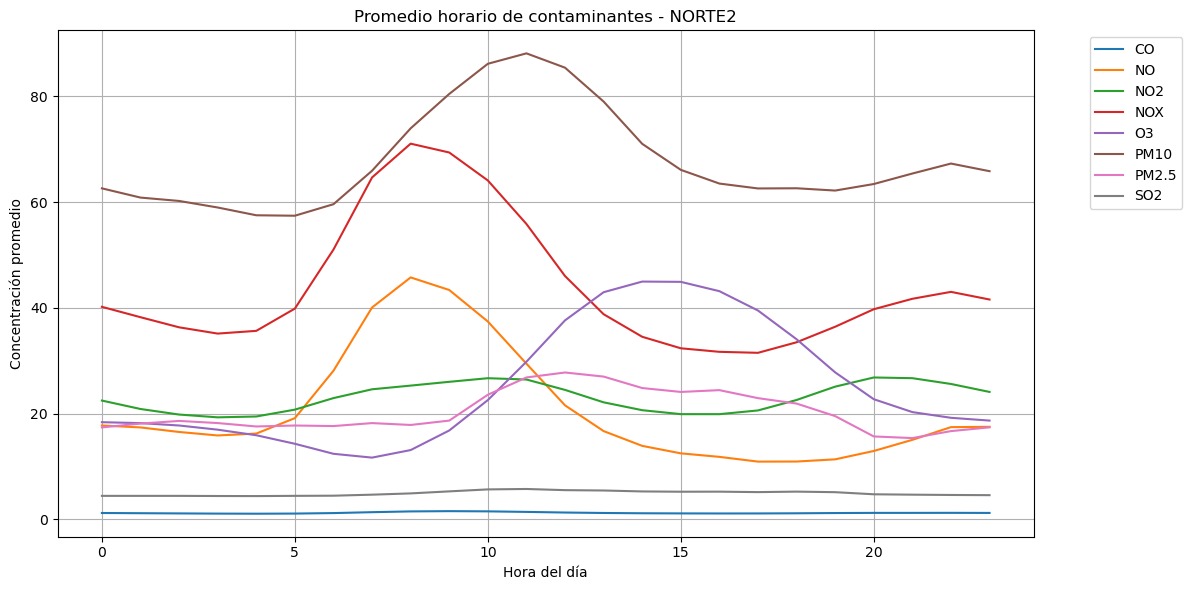

In [74]:
plot_hourly_pollutants(f24_clean)

In [93]:
def plot_hourly_pollutants_v(data_dict):
    """
    Para cada estación en el diccionario:
    - Convierte la columna 'date' de epoch a datetime
    - Calcula el promedio por hora del día de los contaminantes
    - Grafica las 24 horas con el promedio de cada contaminante
    """

    pollutants = ["NO", "NO2", "NOX", "SO2"]

    for station, df in data_dict.items():
        # Convertir la columna 'date' a datetime
        df['date'] = pd.to_datetime(df['date'], unit='s')

        # Crear columna con la hora del día
        df['Hora'] = df['date'].dt.hour

        # Filtrar solo contaminantes + Hora
        df_pollutants = df[pollutants + ['Hora', 'weekday']]

        #Eliminar días que no sean de semana
        df_pollutants_weekday = df_pollutants[df_pollutants['weekday'] < 5].copy()

        # Calcular promedios por hora
        hourly_means = df_pollutants_weekday.groupby('Hora').mean()

        # Graficar
        plt.figure(figsize=(12, 6))
        for col in pollutants:
            if col in hourly_means.columns:
                plt.plot(hourly_means.index, hourly_means[col], label=col)

        plt.title(f"Promedio horario de contaminantes - {station}")
        plt.xlabel("Hora del día")
        plt.ylabel("Concentración promedio")
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

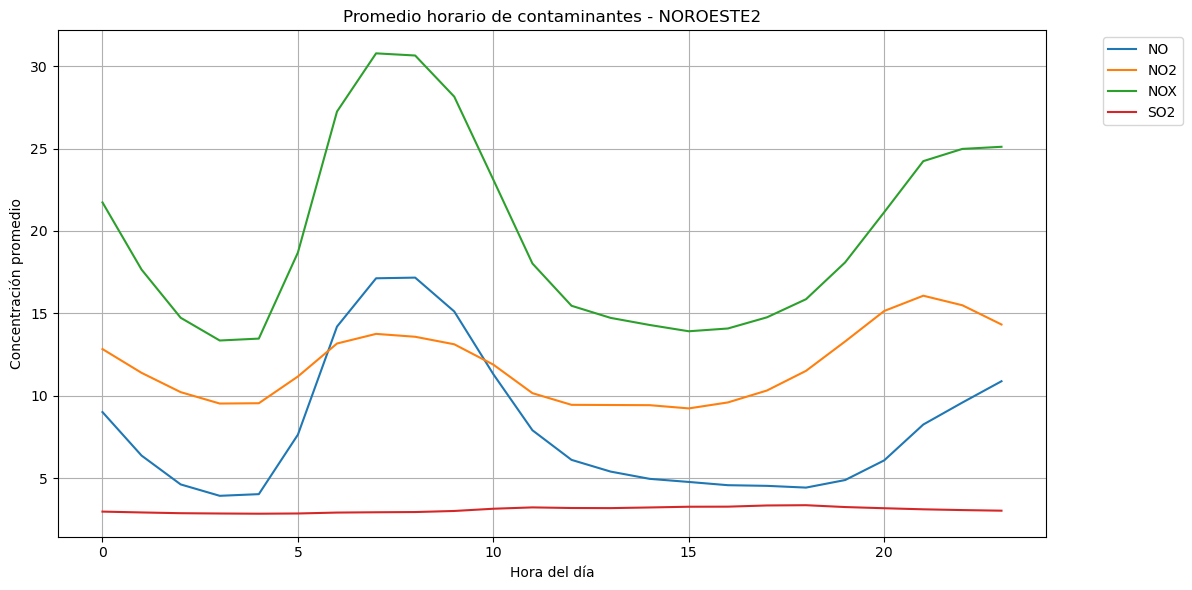

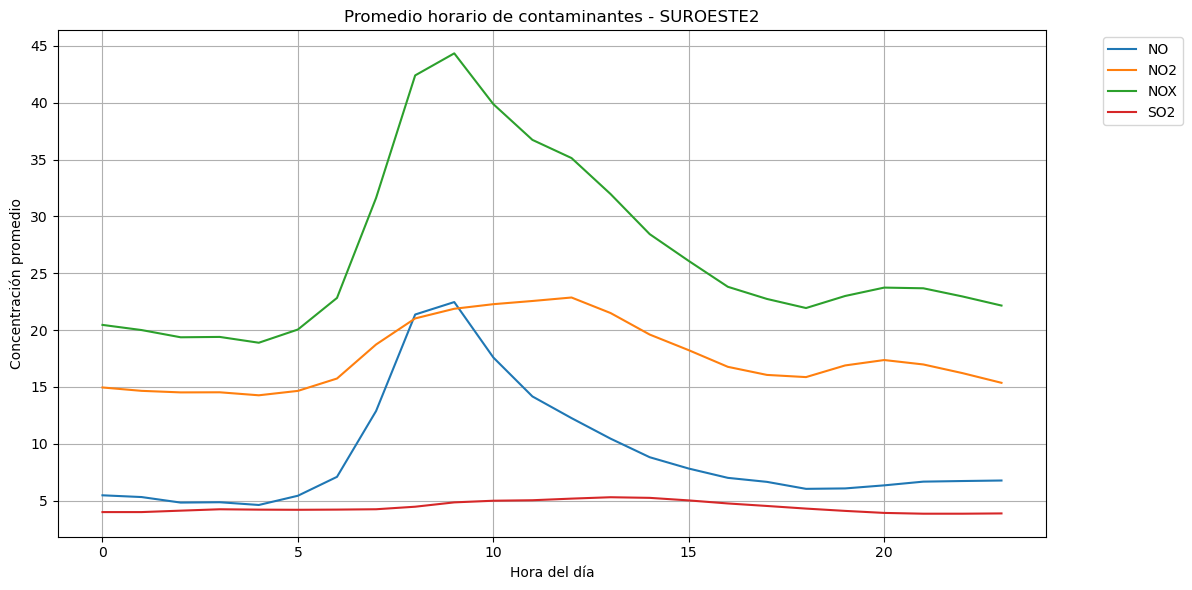

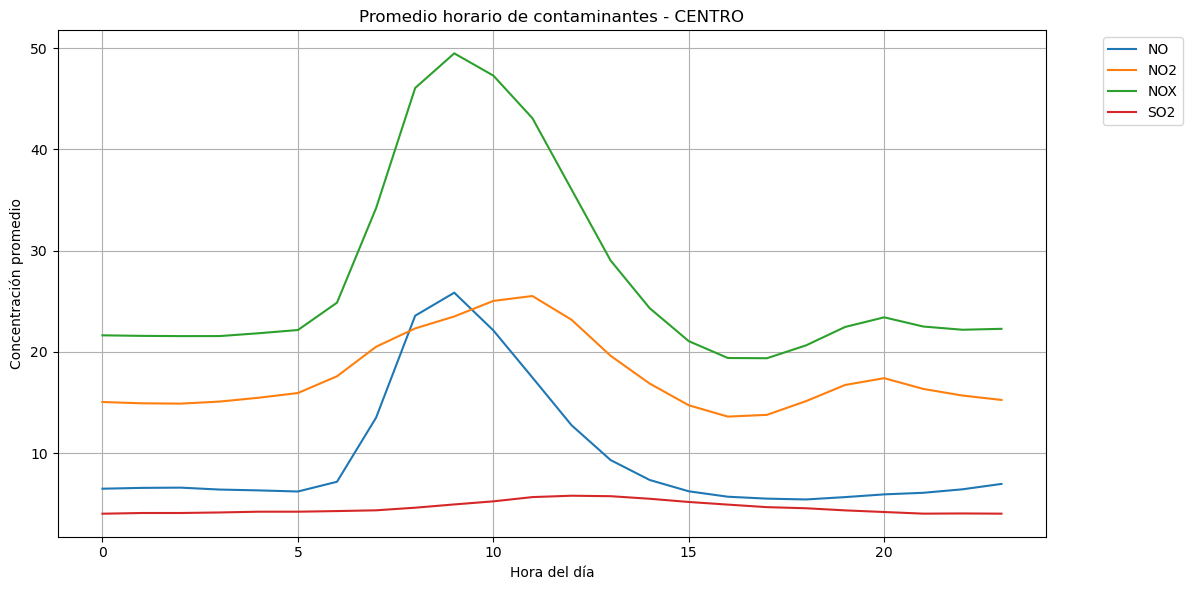

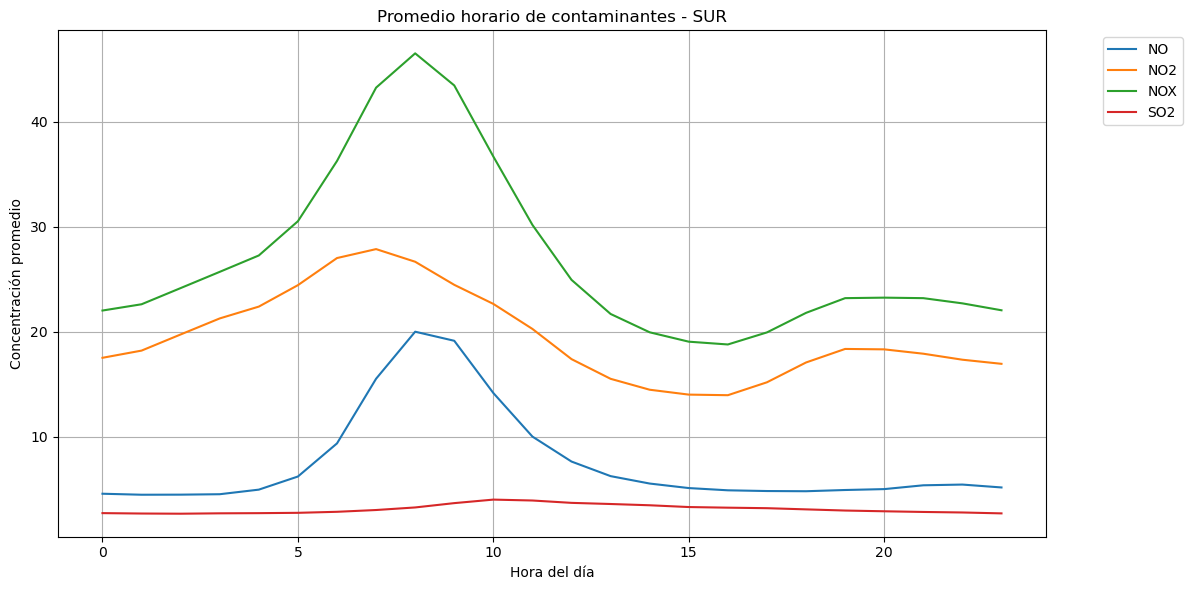

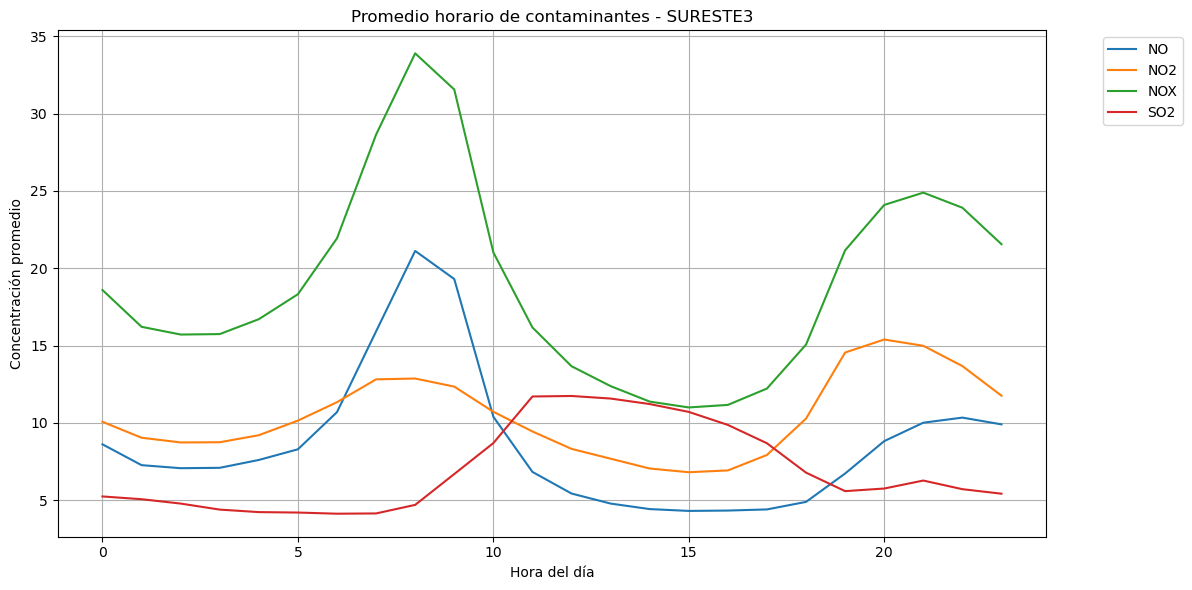

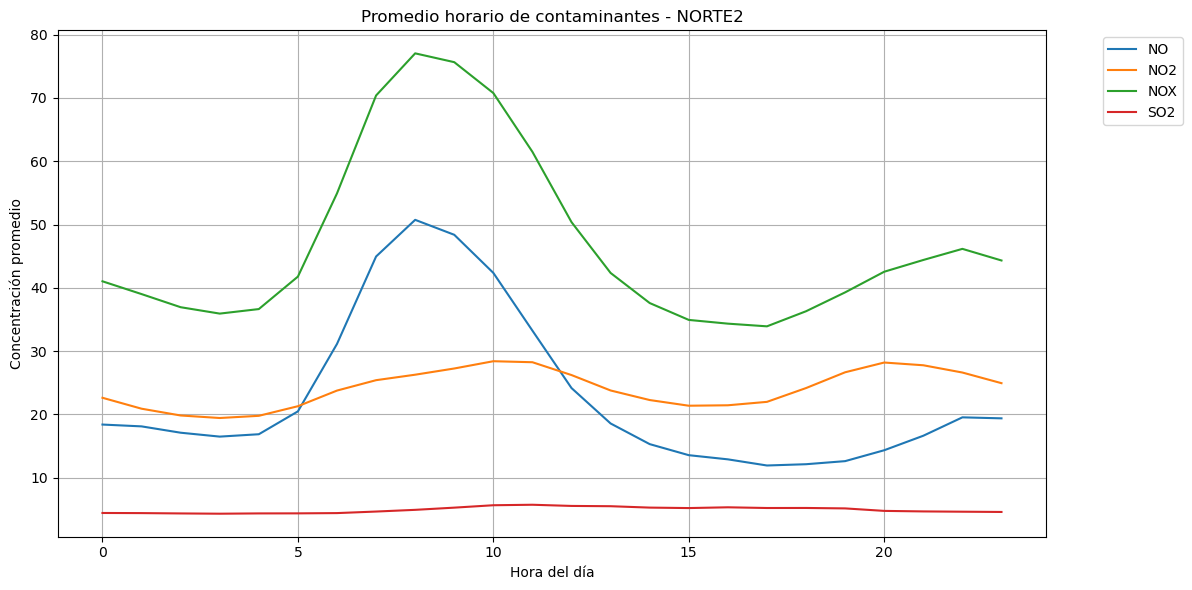

In [94]:
plot_hourly_pollutants_v(f24_clean_weekday)

In [90]:
f24_clean_weekday["NOROESTE2"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22630 entries, 0 to 22629
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     22630 non-null  datetime64[ns]
 1   CO       22630 non-null  float64       
 2   NO       22630 non-null  float64       
 3   NO2      22630 non-null  float64       
 4   NOX      22630 non-null  float64       
 5   O3       22630 non-null  float64       
 6   PM10     22630 non-null  float64       
 7   PM2.5    22630 non-null  float64       
 8   PRS      22630 non-null  float64       
 9   RAINF    22630 non-null  float64       
 10  RH       22630 non-null  float64       
 11  SO2      22630 non-null  float64       
 12  SR       22630 non-null  float64       
 13  TOUT     22630 non-null  float64       
 14  WSR      22630 non-null  float64       
 15  WDR      22630 non-null  float64       
 16  weekday  22630 non-null  int32         
 17  Hora     22630 non-null  int32 